In [231]:
import networkx as nx
import matplotlib.pyplot as plt
import fast_matrix_market as fmm
from grave import plot_network
import random




In [232]:
# G = nx.Graph()
# N = 20

# #NxN grid
# for i in range(N*N):
#     G.add_node(i)

# for i in range(N*N):
#     x = i//N
#     y = i % N
#     neighbors = [[x-1,y-1],[x-1,y],[x-1,y+1],[x,y-1],[x,y+1],[x+1,y-1],[x+1,y],[x+1,y+1]]

#     for ni in neighbors:
#         if 0<=ni[0]<N and 0<=ni[1]<N:
#             ni_index = N*ni[0] + ni[1]
#             G.add_edge(i,ni_index)

# print(G)
# # nx.draw_spectral(G)
# # fig, ax = plt.subplots()
# # plot_network(G)

# # A = nx.nx_agraph.to_agraph(G)
# # H = nx.nx_agraph.from_agraph(A)
# # # nx.draw(H)
# # H.draw()
# pos = nx.nx_agraph.graphviz_layout(G)
# plt.figure(figsize=(20,20))

# # nx.draw_networkx(G, pos)
# # plt.show()

In [233]:
G = nx.Graph()
N = 30

#NxN grid
for i in range(N*N):
    G.add_node(i)

for i in range(N*N):
    x = i//N
    y = i % N
    neighbors = [[x-1,y-1],[x-1,y],[x-1,y+1],[x,y-1],[x,y+1],[x+1,y-1],[x+1,y],[x+1,y+1]]

    for ni in neighbors:
        if 0<=ni[0]<N and 0<=ni[1]<N:
            ni_index = N*ni[0] + ni[1]
            G.add_edge(i,ni_index)


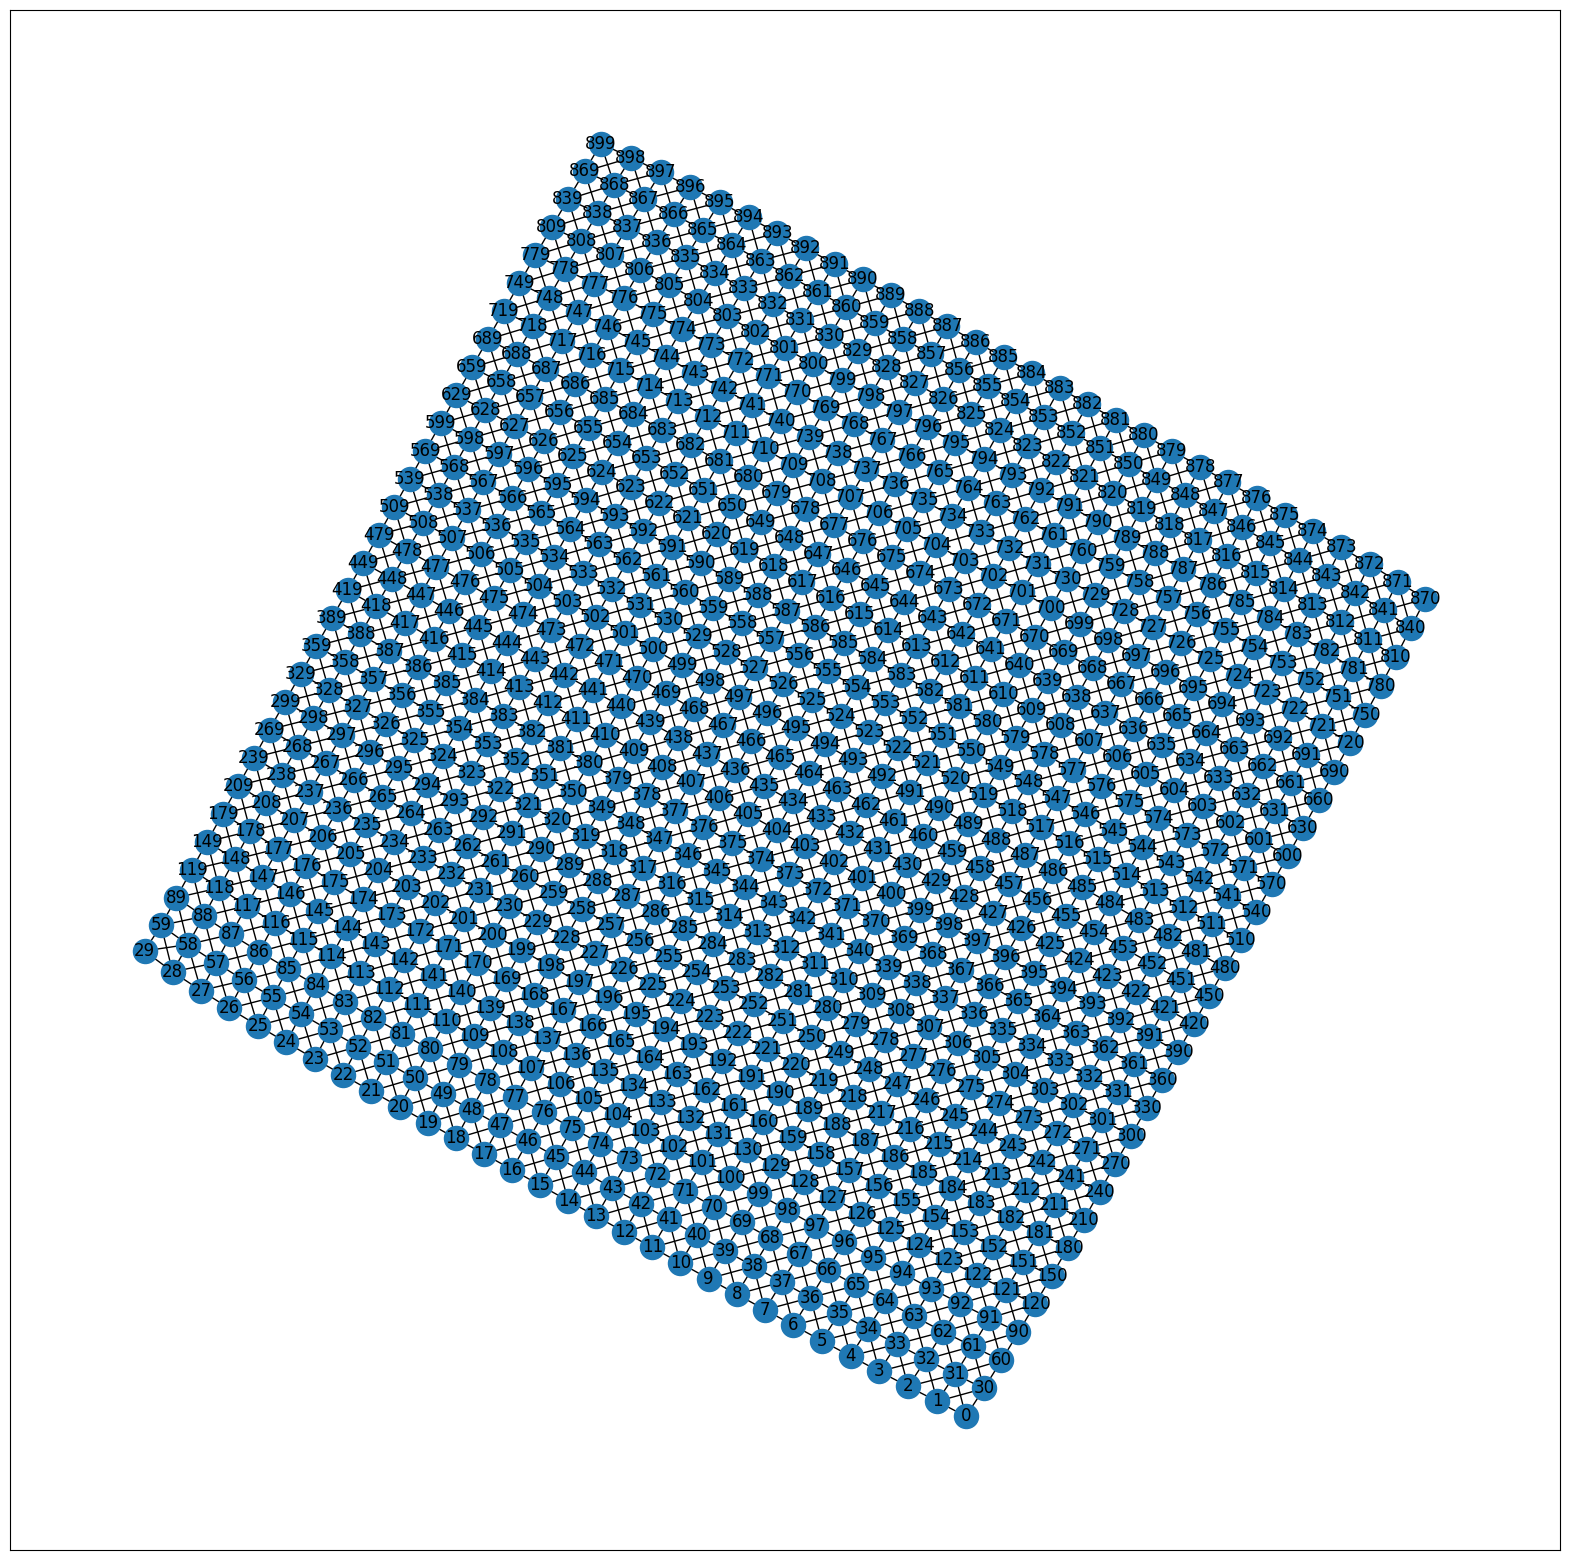

In [234]:
# G = nx.convert_node_labels_to_integers(nx.hexagonal_lattice_graph(10,20))
# G = nx.convert_node_labels_to_integers(nx.triangular_lattice_graph(10,20))

# G = nx.convert_node_labels_to_integers(nx.grid_graph(dim=(30, 30)))

node_count = G.number_of_nodes()
pos = nx.nx_agraph.graphviz_layout(G)
plt.figure(figsize=(20,20))
nx.draw_networkx(G, pos)
# nx.draw_spring(G)

plt.show()

centers: [474, 627, 382, 273, 141, 190, 887, 692, 6]
labels:  [6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 190, 190, 190, 141, 141, 141, 141, 141, 141, 141, 141, 141, 141, 141, 141, 141, 141, 141, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 190, 190, 190, 190, 190, 141, 141, 141, 141, 141, 141, 141, 141, 141, 141, 141, 141, 141, 141, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 190, 190, 190, 190, 190, 190, 141, 141, 141, 141, 141, 141, 141, 141, 141, 141, 141, 141, 141, 141, 273, 6, 6, 6, 6, 6, 6, 190, 190, 190, 190, 190, 190, 190, 190, 190, 141, 141, 141, 141, 141, 141, 141, 141, 141, 141, 141, 141, 141, 141, 273, 273, 6, 6, 6, 6, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 141, 141, 141, 141, 141, 141, 141, 141, 141, 141, 141, 141, 141, 382, 273, 273, 273, 273, 273, 273, 273, 190, 190, 190, 190, 190, 190, 190, 190, 190, 141, 141, 141, 141, 141, 141, 141, 141, 141, 141, 141, 141, 382, 382, 273, 273, 273, 273, 273, 273, 273, 190, 190, 190, 190, 190, 190, 190, 190, 190, 141, 141, 141, 141, 141, 141, 141, 141, 141

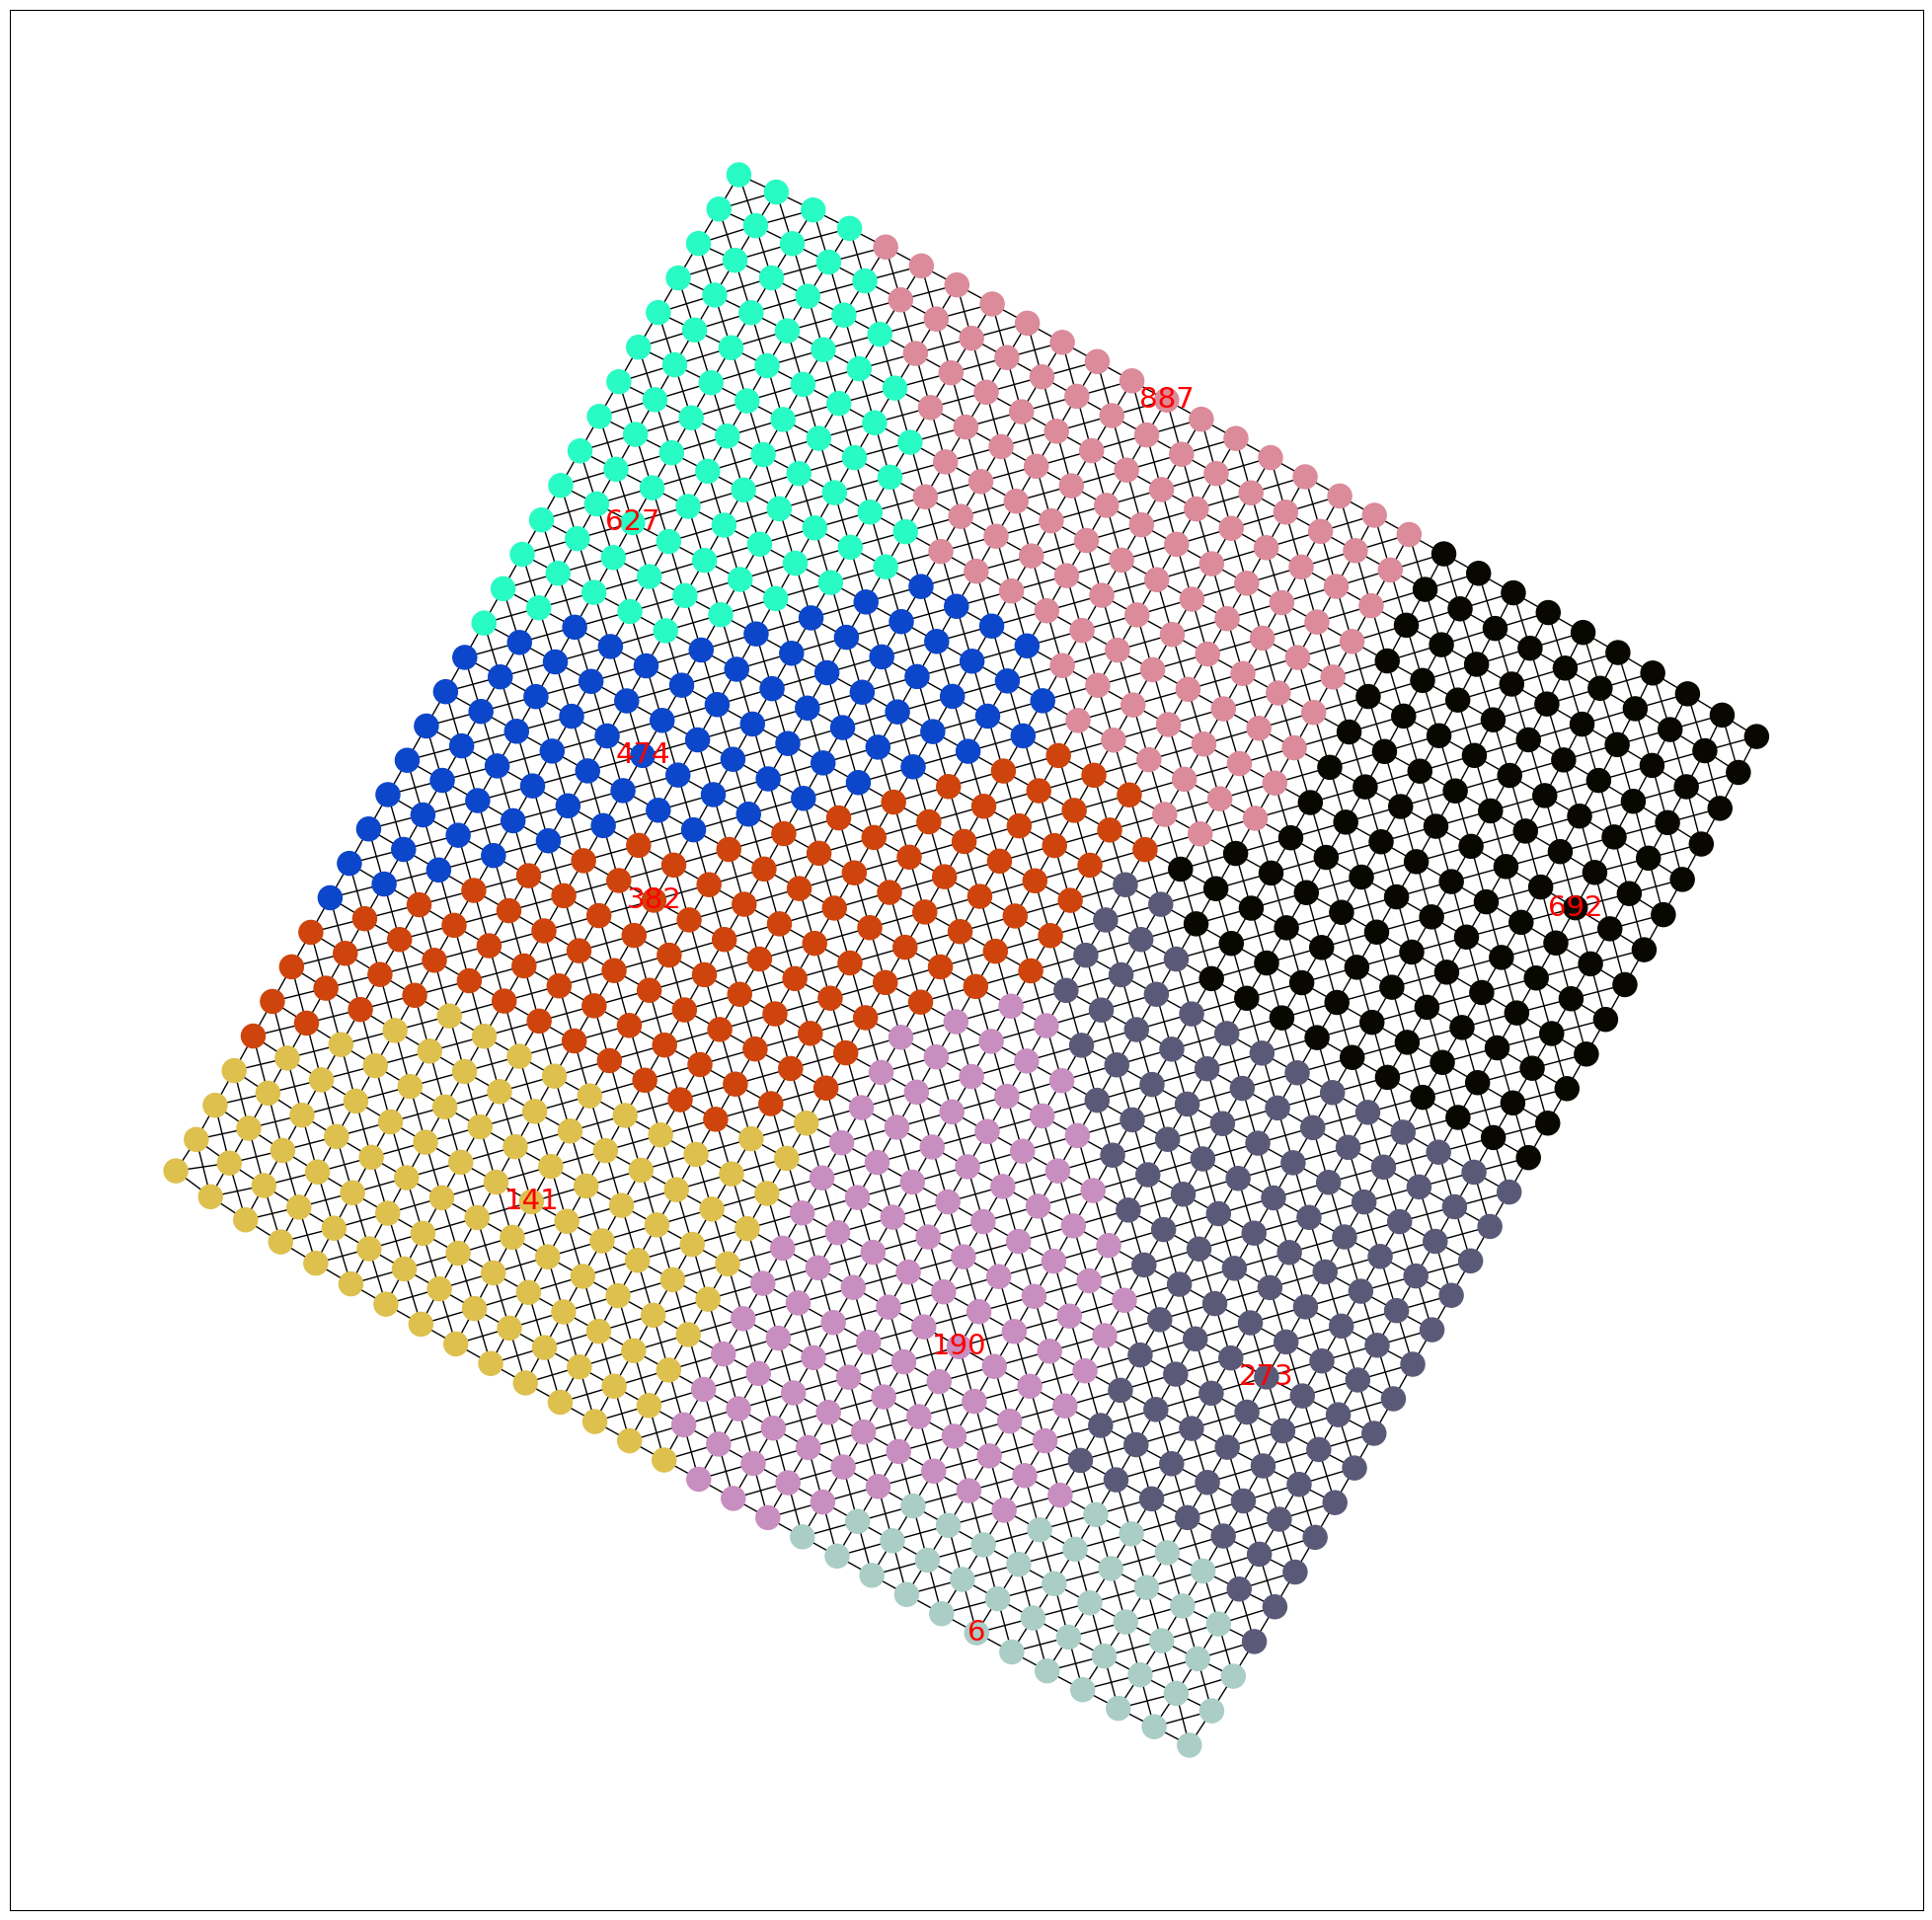

In [235]:
cluster_label = [-1 for i in range(node_count)]
cluster_distance = [float('inf') for i in range(node_count)]
partition_count = 9
random.seed(partition_count)

centers = []

for p in range(partition_count):
    centers.append(random.randrange(0,node_count))


def cluster_to_color(ci):

    # ci = (7**ci) % 100
    # tmp = hex((13*ci)**3 + (7*ci)**5)
    # part = tmp[2]+tmp[-1]
    # if ci < 10:
    #     ci+=80
    # ci_str = str(ci)
    # ci_str2 = str(ci//2)
    # return f"#{ci_str[::-1]}{ci_str2.rjust(2,'0')[::-1]}{ci_str}"
    # return f"#{part}{part[::-1]}{part[1]}{part[1]}"

    arr=['0','1','2','3','4','5','6','7','8','9','a','b','c','d','e','f']
    part=""
    random.seed(ci)
    # for i in range(34534,34534+6):
    #     part+=hex(ci*ci*(234567*ci*i))[-2]
    for i in range(6):
        idx = (ci*random.randint(2**10,2**26))%16
        part+=str(arr[idx])
    return f"#{part}"


for center in centers:
    li=0

    for layer in nx.bfs_layers(G,[center]):
        if li==0:
            cluster_label[layer[0]] = center
            cluster_distance[layer[0]] = 0
            li+=1
            continue

        # print(layer)
        for x in layer:
            if li < cluster_distance[x]:
                cluster_label[x] = center
                cluster_distance[x] = li
        li+=1
print("centers:", centers)
print("labels: ", cluster_label)
# pos = nx.nx_agraph.graphviz_layout(G)
plt.figure(figsize=(25,25))
node_color=[cluster_to_color(c) for c in cluster_label]
labels={}
for i in range(node_count):
    labels[i] = ""

for center in centers:
    labels[center] = str(center)
nx.draw_networkx(G, pos,cluster_label,node_color=node_color,labels=labels,font_color='red',font_size=21)
plt.show()

In [236]:
# graph_mat = fmm.read_array("dolphins.mtx")

# print(graph_mat)

# G = nx.Graph()

# for i in range(61):
#     G.add_node(i)

# for i in range(61):
#     for j in range(61):
#         if graph_mat[i][j] != 0:
#             G.add_edge(i,j)
# nx.draw_random(G)
# plt.show()
# fig, ax = plt.subplots()
# plot_network(G)

# plt.savefig("plot.png")